In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

historical_data_df = pd.read_excel('MarketData.xlsx')
historical_data_df['Date'] = pd.to_datetime(historical_data_df['Date'], format='%d.%m.%y %H:%M:%S')
historical_data_df.sort_values(by='Date', inplace=True)

historical_data_df['Lag24'] = historical_data_df['Prices'].shift(24)
historical_data_df['Lag168'] = historical_data_df['Prices'].shift(168)

historical_data_df = historical_data_df.dropna()

X = historical_data_df[['Lag24', 'Lag168']]
y = historical_data_df['Prices']

start_index = X.index[0]
end_index = X.index[-1]

predictions = []
actual_values = []

model = LinearRegression()

for i in range(start_index+1000, end_index+1):
    train_indices = X.index[(X.index < i)]
    test_indices = [i]

    X_train = X.loc[train_indices]
    y_train = y.loc[train_indices]
    X_test = X.loc[test_indices]

    model.fit(X_train, y_train)

    y_pred_i = model.predict(X_test)[0]
    predictions.append(y_pred_i)
    actual_values.append(y.loc[i])

predictions = np.array(predictions)
actual_values = np.array(actual_values)

mean_error = np.mean(predictions - actual_values)
mse = mean_squared_error(actual_values, predictions)
mae = mean_absolute_error(actual_values, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predictions)

def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)

wmape_value = wmape(actual_values, predictions)

print("Mean Error:", mean_error)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)
print("WMAPE:", wmape_value)

Mean Error: -23.646309912549352
MSE: 213513.71501418902
MAE: 337.9222166644511
RMSE: 462.07544298976654
R^2: 0.5173732253859864
WMAPE: 0.15442224865383913


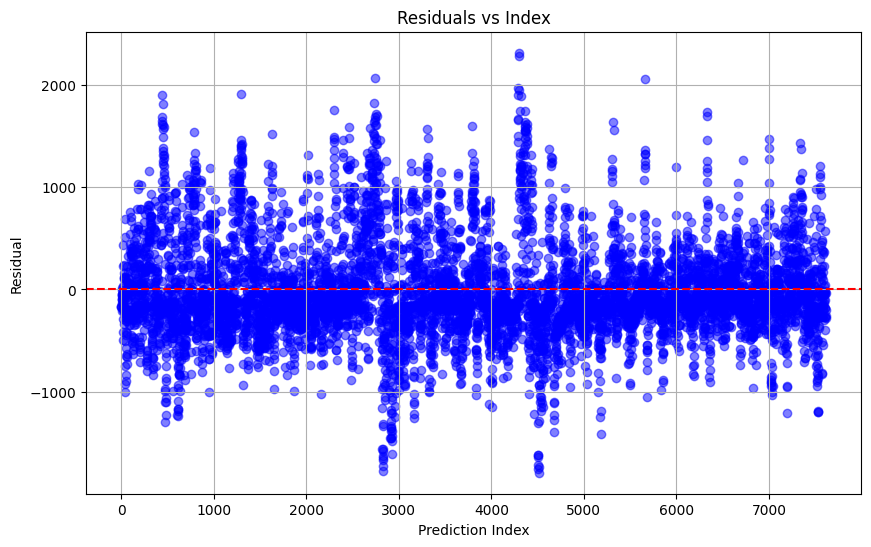

In [6]:
residuals = predictions - actual_values
plt.figure(figsize=(10,6))
plt.scatter(range(len(residuals)), residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Index')
plt.xlabel('Prediction Index')
plt.ylabel('Residual')
plt.grid(True)
plt.show()